In [9]:
%matplotlib notebook
%load_ext autoreload
%pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [10]:
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'
import torch
sys.path.append('..')
import project

torch.cuda.is_available()

True

In [3]:
%autoreload
emory4dct = project.imaging.Emory4DCT('../data/Emory-4DCT')
emory4dct

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [4]:
import nibabel as nib
from totalsegmentator.python_api import totalsegmentator
from totalsegmentator.libs import combine_masks
help(totalsegmentator)

Help on function totalsegmentator in module totalsegmentator.python_api:

totalsegmentator(input: Union[str, pathlib.Path, nibabel.nifti1.Nifti1Image], output: Union[str, pathlib.Path, NoneType], ml=False, nr_thr_resamp=1, nr_thr_saving=6, fast=False, nora_tag='None', preview=False, task='total', roi_subset=None, statistics=False, radiomics=False, crop_path=None, body_seg=False, force_split=False, output_type='nifti', quiet=False, verbose=False, test=0, skip_saving=False, device='gpu', license_number=None, statistics_exclude_masks_at_border=True, no_derived_masks=False, v1_order=False, fastest=False, roi_subset_robust=None)
    Run TotalSegmentator from within python.
    
    For explanation of the arguments see description of command line
    arguments in bin/TotalSegmentator.
    
    Return: multilabel Nifti1Image



In [5]:
%%time
for case in emory4dct.cases:
    for phase in emory4dct.phases:
        print(f'Segmenting {case.case_name} phase {phase}')
        
        image_file = case.nifti_file(phase=phase)
        mask_file = case.mask_file(phase=phase, roi='lung_combined_mask')
        mask_dir = mask_file.parent
        
        totalsegmentator(
            input=image_file,
            output=mask_dir,
            task='total',
            roi_subset=[
                'lung_upper_lobe_right',
                'lung_middle_lobe_right',
                'lung_lower_lobe_right',
                'lung_upper_lobe_left',
                'lung_lower_lobe_left'
            ],
        )
        totalsegmentator(
            input=image_file,
            output=mask_dir,
            task='lung_vessels'
        )
        totalsegmentator(
            input=image_file,
            output=mask_dir,
            task='body'
        )
        mask_nii = combine_masks(
            mask_dir=mask_dir,
            class_type='lung'
        )
        nib.save(mask_nii, mask_file)

Segmenting Case1Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
  0%|          | 0/1 [00:00<?, ?it/s]/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/torch/nn/modules/conv.py:605: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1712608839953/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv3d(
100%|██████████| 1/1 [00:12<00:00, 12.71s/it]


  Predicted in 34.87s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 93)
Resampling...
  Resampled in 1.13s
Predicting part 1 of 1 ...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:01<00:00,  3.58it/s]


  Predicted in 9.88s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.22it/s]


  Predicted in 6.71s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 93)
Predicting...


100%|██████████| 48/48 [00:04<00:00, 11.50it/s]


  Predicted in 20.56s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 29.19it/s]


  Predicted in 7.81s


100%|██████████| 1/1 [00:00<00:00, 18.80it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.22s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.32it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 93)
Resampling...
  Resampled in 1.13s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 171.94it/s]


  Predicted in 7.58s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.37it/s]


  Predicted in 6.41s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 93)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.13it/s]


  Predicted in 18.58s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.34s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.58s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.66it/s]


  Predicted in 7.56s


100%|██████████| 1/1 [00:00<00:00, 18.45it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.54it/s]


  Predicted in 6.38s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.17s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 177.35it/s]


  Predicted in 7.55s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.85it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.15it/s]


  Predicted in 18.65s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.35s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.18it/s]


  Predicted in 7.62s


100%|██████████| 1/1 [00:00<00:00, 18.28it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.23s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.99it/s]


  Predicted in 6.43s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.16s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 175.62it/s]


  Predicted in 7.56s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.79it/s]


  Predicted in 6.46s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.17it/s]


  Predicted in 18.77s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.35s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.68it/s]


  Predicted in 7.57s


100%|██████████| 1/1 [00:00<00:00, 18.36it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.98it/s]


  Predicted in 6.34s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.15s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 177.82it/s]


  Predicted in 7.50s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.46it/s]


  Predicted in 6.38s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.14it/s]


  Predicted in 18.76s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.49it/s]


  Predicted in 7.54s


100%|██████████| 1/1 [00:00<00:00, 18.02it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.30it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.15s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 177.57it/s]


  Predicted in 7.60s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.23s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.99it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.14it/s]


  Predicted in 18.67s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.26it/s]


  Predicted in 7.66s


100%|██████████| 1/1 [00:00<00:00, 18.39it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.17it/s]


  Predicted in 6.31s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.15s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 174.72it/s]


  Predicted in 7.63s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 89.08it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.13it/s]


  Predicted in 18.63s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.12it/s]


  Predicted in 7.60s


100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.32it/s]


  Predicted in 6.34s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.15s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 177.32it/s]


  Predicted in 7.57s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.88it/s]


  Predicted in 6.34s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.14it/s]


  Predicted in 18.85s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.54it/s]


  Predicted in 7.50s


100%|██████████| 1/1 [00:00<00:00, 18.29it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.50it/s]


  Predicted in 6.45s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.15s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 174.15it/s]


  Predicted in 7.81s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 89.73it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.16it/s]


  Predicted in 18.81s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.12it/s]


  Predicted in 7.67s


100%|██████████| 1/1 [00:00<00:00, 17.65it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case1Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.51it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Resampling...
  Resampled in 1.16s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 177.47it/s]


  Predicted in 7.57s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.14it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 193, 94)
Predicting...


100%|██████████| 48/48 [00:02<00:00, 18.11it/s]


  Predicted in 18.79s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 1.57s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.73it/s]


  Predicted in 7.60s


100%|██████████| 1/1 [00:00<00:00, 18.48it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.14it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Resampling...
  Resampled in 2.29s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.45it/s]


  Predicted in 8.66s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.44s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 75.66it/s]


  Predicted in 6.36s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


  Predicted in 30.78s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.35s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.39s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.00it/s]


  Predicted in 9.44s


100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.22s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.64it/s]


  Predicted in 6.35s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Resampling...
  Resampled in 2.29s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.94it/s]


  Predicted in 8.63s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.44s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.25it/s]


  Predicted in 6.54s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.39it/s]


  Predicted in 30.62s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.35s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.40s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.14it/s]


  Predicted in 9.39s


100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.82it/s]


  Predicted in 6.43s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Resampling...
  Resampled in 2.25s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 32.47it/s]


  Predicted in 9.12s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.65it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


  Predicted in 30.52s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.50s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.09it/s]


  Predicted in 9.46s


100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.75it/s]


  Predicted in 6.48s
Resampling...
  cropping from (256, 256, 94) to (249, 204, 88)
Resampling...
  Resampled in 2.49s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.89it/s]


  Predicted in 9.02s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.44s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.36it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (249, 204, 88)
Predicting...


100%|██████████| 120/120 [00:06<00:00, 17.26it/s]


  Predicted in 33.67s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.41s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.03it/s]


  Predicted in 9.48s


100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.23s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 107.24it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Resampling...
  Resampled in 2.24s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.10it/s]


  Predicted in 8.88s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 107.52it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


  Predicted in 30.50s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.41s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.13it/s]


  Predicted in 9.50s


100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.84it/s]


  Predicted in 6.66s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 84)
Resampling...
  Resampled in 2.14s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.96it/s]


  Predicted in 8.89s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 89.51it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 84)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


  Predicted in 29.77s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.41s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.11it/s]


  Predicted in 9.54s


100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.98it/s]


  Predicted in 6.61s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Resampling...
  Resampled in 2.24s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.09it/s]


  Predicted in 8.97s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.20it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 88)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


  Predicted in 30.55s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.43s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.07it/s]


  Predicted in 9.58s


100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.55it/s]


  Predicted in 6.64s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Resampling...
  Resampled in 2.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.40it/s]


  Predicted in 8.80s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.56it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.34it/s]


  Predicted in 30.84s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.41s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.16it/s]


  Predicted in 9.62s


100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.40it/s]


  Predicted in 6.83s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Resampling...
  Resampled in 2.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.60it/s]


  Predicted in 8.85s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.06it/s]


  Predicted in 6.62s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.33it/s]


  Predicted in 30.84s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.42s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.97it/s]


  Predicted in 9.58s


100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case2Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.99it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Resampling...
  Resampled in 2.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.66it/s]


  Predicted in 9.10s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.66it/s]


  Predicted in 6.62s
Resampling...
  cropping from (256, 256, 94) to (249, 185, 90)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.34it/s]


  Predicted in 31.04s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.41s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.01it/s]


  Predicted in 9.41s


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.12it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 97.79it/s]


  Predicted in 6.89s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.59it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 89.63it/s]


  Predicted in 8.84s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 93.66it/s]


  Predicted in 6.76s


100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.67it/s]


  Predicted in 6.31s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 99.18it/s]


  Predicted in 6.68s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.47it/s]


  Predicted in 6.40s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 96.78it/s]


  Predicted in 8.65s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 94.24it/s]


  Predicted in 6.72s


100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.66it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 98.51it/s]


  Predicted in 6.67s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.53it/s]


  Predicted in 6.32s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 95.09it/s]


  Predicted in 8.69s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.47it/s]


  Predicted in 6.63s


100%|██████████| 1/1 [00:00<00:00, 3305.20it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.76it/s]


  Predicted in 6.43s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 88.24it/s]


  Predicted in 6.63s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.91it/s]


  Predicted in 6.41s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 97.89it/s]


  Predicted in 8.55s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.69it/s]


  Predicted in 6.74s


100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 84.22it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 100.47it/s]


  Predicted in 6.69s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.11it/s]


  Predicted in 6.30s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 95.98it/s]


  Predicted in 8.61s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.55it/s]


  Predicted in 6.58s


100%|██████████| 1/1 [00:00<00:00, 3010.99it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 94.39it/s]


  Predicted in 6.33s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.19s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 101.97it/s]


  Predicted in 6.71s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


  Predicted in 6.32s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 93.77it/s]


  Predicted in 8.58s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.99it/s]


  Predicted in 6.34s


100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 107.08it/s]


  Predicted in 6.32s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 101.10it/s]


  Predicted in 6.80s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.52it/s]


  Predicted in 6.37s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 99.02it/s]


  Predicted in 8.67s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.71it/s]


  Predicted in 6.70s


100%|██████████| 1/1 [00:00<00:00, 3201.76it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.39it/s]


  Predicted in 6.33s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 98.60it/s]


  Predicted in 6.62s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 87.84it/s]


  Predicted in 6.35s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 81.80it/s]


  Predicted in 8.59s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.49it/s]


  Predicted in 6.63s


100%|██████████| 1/1 [00:00<00:00, 2933.08it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.59it/s]


  Predicted in 6.36s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 100.50it/s]


  Predicted in 6.66s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.91it/s]


  Predicted in 6.35s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 95.03it/s]


  Predicted in 8.59s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.36s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.23it/s]


  Predicted in 6.71s


100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case3Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.19s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 106.31it/s]


  Predicted in 6.38s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Resampling...
  Resampled in 0.20s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 100.17it/s]


  Predicted in 6.71s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.12it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 256, 94)
Predicting...


100%|██████████| 1/1 [00:00<00:00, 94.10it/s]


  Predicted in 8.66s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.44it/s]


  Predicted in 6.66s


100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.83it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 134.60it/s]


  Predicted in 7.48s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.55it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.18it/s]


  Predicted in 13.63s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.87s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 178.06it/s]


  Predicted in 7.17s


100%|██████████| 1/1 [00:00<00:00, 34.81it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.31s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 89.43it/s]


  Predicted in 6.40s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 134.08it/s]


  Predicted in 7.13s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.40it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 20.92it/s]


  Predicted in 13.70s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.87s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 176.58it/s]


  Predicted in 6.98s


100%|██████████| 1/1 [00:00<00:00, 34.32it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.60it/s]


  Predicted in 6.36s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 140.08it/s]


  Predicted in 7.14s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.35it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 20.98it/s]


  Predicted in 13.74s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.88s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 175.32it/s]


  Predicted in 7.18s


100%|██████████| 1/1 [00:00<00:00, 34.33it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.30it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 137.11it/s]


  Predicted in 7.24s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.58it/s]


  Predicted in 6.48s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.22it/s]


  Predicted in 13.75s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.87s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 174.12it/s]


  Predicted in 7.20s


100%|██████████| 1/1 [00:00<00:00, 34.54it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.43it/s]


  Predicted in 6.42s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 137.81it/s]


  Predicted in 7.21s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.63it/s]


  Predicted in 6.54s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 20.94it/s]


  Predicted in 13.64s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.87s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 176.97it/s]


  Predicted in 7.33s


100%|██████████| 1/1 [00:00<00:00, 34.69it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.98it/s]


  Predicted in 6.39s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.69s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 134.20it/s]


  Predicted in 7.31s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 92.58it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.20it/s]


  Predicted in 13.69s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.88s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 174.66it/s]


  Predicted in 7.38s


100%|██████████| 1/1 [00:00<00:00, 33.91it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.29it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 222, 93)
Resampling...
  Resampled in 0.71s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 136.67it/s]


  Predicted in 7.20s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.25it/s]


  Predicted in 6.75s
Resampling...
  cropping from (256, 256, 94) to (256, 222, 93)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.02it/s]


  Predicted in 13.84s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.88s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 174.92it/s]


  Predicted in 7.19s


100%|██████████| 1/1 [00:00<00:00, 34.08it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 80.02it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 222, 93)
Resampling...
  Resampled in 0.71s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 136.68it/s]


  Predicted in 7.33s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.52s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 94.95it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 222, 93)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.06it/s]


  Predicted in 13.81s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.89s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 172.20it/s]


  Predicted in 7.17s


100%|██████████| 1/1 [00:00<00:00, 33.97it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.57it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.70s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 136.31it/s]


  Predicted in 7.17s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 104.85it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 20.98it/s]


  Predicted in 13.71s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.88s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 175.92it/s]


  Predicted in 7.22s


100%|██████████| 1/1 [00:00<00:00, 34.16it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case4Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.37it/s]


  Predicted in 6.46s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Resampling...
  Resampled in 0.70s
Predicting part 1 of 1 ...


100%|██████████| 2/2 [00:00<00:00, 128.94it/s]


  Predicted in 7.26s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.22s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 85.43it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 214, 94)
Predicting...


100%|██████████| 18/18 [00:00<00:00, 21.04it/s]


  Predicted in 13.65s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.87s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 4/4 [00:00<00:00, 175.00it/s]


  Predicted in 7.28s


100%|██████████| 1/1 [00:00<00:00, 34.53it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.52it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.78s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 169.70it/s]


  Predicted in 7.47s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.20it/s]


  Predicted in 8.59s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.28it/s]


  Predicted in 15.02s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.52it/s]


  Predicted in 7.30s


100%|██████████| 1/1 [00:00<00:00, 29.93it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.42it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.78s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 168.81it/s]


  Predicted in 7.43s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.60it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.43it/s]


  Predicted in 14.90s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.19it/s]


  Predicted in 7.52s


100%|██████████| 1/1 [00:00<00:00, 30.69it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.69it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.79s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 173.15it/s]


  Predicted in 7.43s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.57s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.47it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.48it/s]


  Predicted in 15.40s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.26it/s]


  Predicted in 7.39s


100%|██████████| 1/1 [00:00<00:00, 30.61it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 106.99it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.79s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 165.82it/s]


  Predicted in 7.31s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.52s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.03it/s]


  Predicted in 6.62s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.46it/s]


  Predicted in 14.96s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.51it/s]


  Predicted in 7.31s


100%|██████████| 1/1 [00:00<00:00, 29.89it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 89.28it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.78s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 166.27it/s]


  Predicted in 7.54s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.62it/s]


  Predicted in 6.59s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.34it/s]


  Predicted in 15.00s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.55it/s]


  Predicted in 7.31s


100%|██████████| 1/1 [00:00<00:00, 30.59it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.02it/s]


  Predicted in 6.48s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Resampling...
  Resampled in 0.78s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 169.10it/s]


  Predicted in 7.75s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 95.64it/s]


  Predicted in 6.68s
Resampling...
  cropping from (256, 256, 94) to (256, 215, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.33it/s]


  Predicted in 14.96s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.11it/s]


  Predicted in 7.28s


100%|██████████| 1/1 [00:00<00:00, 30.71it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.79it/s]


  Predicted in 6.63s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Resampling...
  Resampled in 0.76s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 171.42it/s]


  Predicted in 7.65s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.53s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.30it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.36it/s]


  Predicted in 16.39s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz

  Saved in 0.54s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.47it/s]


  Predicted in 7.27s


100%|██████████| 1/1 [00:00<00:00, 30.32it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.13it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Resampling...
  Resampled in 0.74s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 170.03it/s]


  Predicted in 7.36s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.40it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.47it/s]


  Predicted in 14.65s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.20it/s]


  Predicted in 7.46s


100%|██████████| 1/1 [00:00<00:00, 30.12it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.29it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Resampling...
  Resampled in 0.74s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 171.47it/s]


  Predicted in 7.38s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.57s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.18it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.36it/s]


  Predicted in 14.54s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 33.09it/s]


  Predicted in 7.54s


100%|██████████| 1/1 [00:00<00:00, 30.41it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case5Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.84it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Resampling...
  Resampled in 0.74s
Predicting part 1 of 1 ...


100%|██████████| 4/4 [00:00<00:00, 167.75it/s]


  Predicted in 7.34s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.74it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (256, 207, 94)
Predicting...


100%|██████████| 27/27 [00:01<00:00, 19.39it/s]


  Predicted in 14.65s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.97s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 8/8 [00:00<00:00, 32.63it/s]


  Predicted in 7.43s


100%|██████████| 1/1 [00:00<00:00, 30.79it/s]

Resampling...


Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 84.68it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (240, 176, 81)
Resampling...
  Resampled in 2.16s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 32.14it/s]


  Predicted in 8.74s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.80it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (240, 176, 81)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


  Predicted in 29.70s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.05s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.06it/s]


  Predicted in 9.66s


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.14it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (240, 180, 78)
Resampling...
  Resampled in 2.14s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.26it/s]


  Predicted in 8.65s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.82it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (240, 180, 78)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 29.35s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.90s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.14it/s]


  Predicted in 9.47s


100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.65it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 72)
Resampling...
  Resampled in 1.91s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.53it/s]


  Predicted in 8.57s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 94.18it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 72)
Predicting...


100%|██████████| 75/75 [00:04<00:00, 17.61it/s]


  Predicted in 26.07s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.91s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.99it/s]


  Predicted in 9.66s


100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.34it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 72)
Resampling...
  Resampled in 1.91s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.07it/s]


  Predicted in 8.61s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 5.93s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.68it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 72)
Predicting...


100%|██████████| 75/75 [00:04<00:00, 17.60it/s]


  Predicted in 26.16s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.90s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.99it/s]


  Predicted in 9.66s


100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.13it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (234, 176, 72)
Resampling...
  Resampled in 1.88s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.94it/s]


  Predicted in 8.45s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.11it/s]


  Predicted in 6.59s
Resampling...
  cropping from (256, 256, 94) to (234, 176, 72)
Predicting...


100%|██████████| 75/75 [00:04<00:00, 17.55it/s]


  Predicted in 25.89s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.90s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.04it/s]


  Predicted in 9.72s


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 994.92s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


  Predicted in 362.89s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 79)
Resampling...
  Resampled in 2.08s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 26.30it/s]


  Predicted in 8.88s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.29it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 79)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.39it/s]


  Predicted in 29.19s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gzCreating lung_vessels.nii.gz

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.92s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.16it/s]


  Predicted in 9.78s


100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.18it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (229, 171, 74)
Resampling...
  Resampled in 1.83s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.94it/s]


  Predicted in 8.56s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.69it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (229, 171, 74)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 27.07s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.92s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.12it/s]


  Predicted in 9.56s


100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 86.82it/s]


  Predicted in 6.84s
Resampling...
  cropping from (256, 256, 94) to (234, 176, 79)
Resampling...
  Resampled in 2.05s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.91it/s]


  Predicted in 10.47s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.53s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.02it/s]


  Predicted in 7.14s
Resampling...
  cropping from (256, 256, 94) to (234, 176, 79)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.29it/s]


  Predicted in 29.38s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.91s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.97it/s]


  Predicted in 9.45s


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.37s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.10it/s]


  Predicted in 6.65s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 76)
Resampling...
  Resampled in 2.02s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 29.67it/s]


  Predicted in 9.94s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.53s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.36it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 76)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 28.97s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.91s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.14it/s]


  Predicted in 9.49s


100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case6Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.25it/s]


  Predicted in 6.62s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 81)
Resampling...
  Resampled in 2.16s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.87it/s]


  Predicted in 9.07s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.96it/s]


  Predicted in 6.67s
Resampling...
  cropping from (256, 256, 94) to (238, 176, 81)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 30.13s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.92s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.93it/s]


  Predicted in 9.69s


100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.93it/s]


  Predicted in 6.54s
Resampling...
  cropping from (256, 256, 94) to (238, 175, 87)
Resampling...
  Resampled in 2.29s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.90it/s]


  Predicted in 8.96s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.67it/s]


  Predicted in 6.54s
Resampling...
  cropping from (256, 256, 94) to (238, 175, 87)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


  Predicted in 31.08s
Saving segmentations...
Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz



  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.00s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.02it/s]


  Predicted in 9.37s


100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.74it/s]


  Predicted in 7.42s
Resampling...
  cropping from (256, 256, 94) to (238, 175, 87)
Resampling...
  Resampled in 2.29s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 32.28it/s]


  Predicted in 8.91s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.25it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (238, 175, 87)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


  Predicted in 31.14s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.01s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.96it/s]


  Predicted in 9.58s


100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.36it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 87)
Resampling...
  Resampled in 2.27s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.09it/s]


  Predicted in 8.87s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.09it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 87)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


  Predicted in 30.65s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.37s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.00s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.13it/s]


  Predicted in 9.64s


100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz

Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.24s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.50it/s]


  Predicted in 6.46s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 87)
Resampling...
  Resampled in 2.27s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.38it/s]


  Predicted in 8.89s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.55s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.72it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 87)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


  Predicted in 30.62s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.00s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.08it/s]


  Predicted in 9.68s


100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.32s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 75.88it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Resampling...
  Resampled in 2.21s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.91it/s]


  Predicted in 8.90s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 93.11it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


  Predicted in 30.26s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.01s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.01it/s]


  Predicted in 9.33s


100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.20it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 82)
Resampling...
  Resampled in 2.14s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.49it/s]


  Predicted in 8.92s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.77it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 82)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 29.59s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.43s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.01s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.06it/s]


  Predicted in 9.64s


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gzCreating body_extremities.nii.gz



  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.63it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (238, 167, 84)
Resampling...
  Resampled in 2.13s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.57it/s]


  Predicted in 8.78s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.52s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.04it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (238, 167, 84)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 29.81s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.00s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.04it/s]


  Predicted in 9.56s


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 32.02it/s]


  Predicted in 8.65s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Resampling...
  Resampled in 2.22s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.12it/s]


  Predicted in 8.78s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.50it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


  Predicted in 30.45s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.01s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.98it/s]


  Predicted in 9.63s


100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.25s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.01it/s]


  Predicted in 7.03s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 84)
Resampling...
  Resampled in 2.20s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.20it/s]


  Predicted in 10.13s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.55s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.03it/s]


  Predicted in 7.03s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 84)
Predicting...


100%|██████████| 100/100 [00:06<00:00, 14.96it/s]


  Predicted in 49.12s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz
  Saved in 0.82s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.02s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.02it/s]


  Predicted in 10.00s


100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case7Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


  Predicted in 6.71s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Resampling...
  Resampled in 2.22s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 29.80it/s]


  Predicted in 8.77s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.21it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (238, 171, 85)
Predicting...


100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


  Predicted in 30.35s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 4.01s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.08it/s]


  Predicted in 9.52s


100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.67it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 94.67it/s]


  Predicted in 6.69s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.92it/s]


  Predicted in 6.44s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.62it/s]


  Predicted in 10.10s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 81.75it/s]


  Predicted in 6.79s


100%|██████████| 1/1 [00:00<00:00, 71.14it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.80it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 92.34it/s]


  Predicted in 6.80s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.53s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.88it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 30.73it/s]


  Predicted in 10.11s
Saving segmentations...
Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz



  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 87.37it/s]


  Predicted in 6.60s


100%|██████████| 1/1 [00:00<00:00, 73.22it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.23it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 90.74it/s]


  Predicted in 6.72s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.82it/s]


  Predicted in 6.45s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 30.37it/s]


  Predicted in 10.19s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.85it/s]


  Predicted in 6.62s


100%|██████████| 1/1 [00:00<00:00, 73.40it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.32s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.51it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 93.38it/s]


  Predicted in 7.07s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 84.79it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.10it/s]


  Predicted in 10.04s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.45s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.65it/s]


  Predicted in 6.81s


100%|██████████| 1/1 [00:00<00:00, 75.08it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.67it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 98.96it/s]


  Predicted in 6.91s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.18it/s]


  Predicted in 6.50s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.07it/s]


  Predicted in 10.12s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.22it/s]


  Predicted in 6.66s


100%|██████████| 1/1 [00:00<00:00, 72.97it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.60it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 91.75it/s]


  Predicted in 6.70s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.68it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.09it/s]


  Predicted in 10.12s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 8.21s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.50it/s]


  Predicted in 6.75s


100%|██████████| 1/1 [00:00<00:00, 75.20it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating body_extremities.nii.gz
  Saved in 0.31s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 84.04it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 95.45it/s]


  Predicted in 6.79s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.88it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.07it/s]


  Predicted in 10.15s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 92.04it/s]


  Predicted in 6.72s


100%|██████████| 1/1 [00:00<00:00, 72.56it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 86.36it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 97.11it/s]


  Predicted in 7.02s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.44it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 31.57it/s]


  Predicted in 10.12s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.35it/s]


  Predicted in 6.75s


100%|██████████| 1/1 [00:00<00:00, 74.65it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.73it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 95.73it/s]


  Predicted in 7.05s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.69it/s]


  Predicted in 6.64s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 30.82it/s]


  Predicted in 10.22s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.46s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.93it/s]


  Predicted in 6.90s


100%|██████████| 1/1 [00:00<00:00, 73.73it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.33s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case8Deploy phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.20s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Resampling...
  Resampled in 0.33s
Predicting part 1 of 1 ...


100%|██████████| 1/1 [00:00<00:00, 97.05it/s]


  Predicted in 6.70s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.57s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.21s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.43it/s]


  Predicted in 6.54s
Resampling...
  cropping from (256, 256, 94) to (256, 178, 94)
Predicting...


100%|██████████| 8/8 [00:00<00:00, 30.39it/s]


  Predicted in 10.43s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 0.52s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.34it/s]


  Predicted in 6.80s


100%|██████████| 1/1 [00:00<00:00, 72.01it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 90.18it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (186, 154, 60)
Resampling...
  Resampled in 1.41s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.06it/s]


  Predicted in 8.19s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.14it/s]


  Predicted in 6.49s
Resampling...
  cropping from (256, 256, 94) to (186, 154, 60)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.81it/s]


  Predicted in 21.24s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.03s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.99it/s]


  Predicted in 9.94s


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.85it/s]


  Predicted in 6.61s
Resampling...
  cropping from (256, 256, 94) to (190, 154, 58)
Resampling...
  Resampled in 1.40s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.54it/s]


  Predicted in 8.16s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.52s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.76it/s]


  Predicted in 6.61s
Resampling...
  cropping from (256, 256, 94) to (190, 154, 58)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.78it/s]


  Predicted in 21.12s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.44s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.05s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.00it/s]


  Predicted in 10.09s


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.79it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (186, 154, 58)
Resampling...
  Resampled in 1.37s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 32.19it/s]


  Predicted in 8.18s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.13it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (186, 154, 58)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.79it/s]


  Predicted in 20.89s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.04s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.14it/s]


  Predicted in 9.78s


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.35s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 78.75it/s]


  Predicted in 6.64s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 71)
Resampling...
  Resampled in 1.62s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.02it/s]


  Predicted in 8.34s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.50it/s]


  Predicted in 6.74s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 71)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.52it/s]


  Predicted in 24.26s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.04s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.13it/s]


  Predicted in 9.87s


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 44.08it/s]


  Predicted in 6.60s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Resampling...
  Resampled in 1.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.54it/s]


  Predicted in 8.26s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.31it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.83it/s]


  Predicted in 20.39s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.04s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.18it/s]


  Predicted in 9.98s


100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.49it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Resampling...
  Resampled in 1.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.53it/s]


  Predicted in 8.18s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.29s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.48it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.81it/s]


  Predicted in 20.78s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.03s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.05it/s]


  Predicted in 9.92s


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.09it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Resampling...
  Resampled in 1.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.72it/s]


  Predicted in 8.21s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.57it/s]


  Predicted in 6.67s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.84it/s]


  Predicted in 20.38s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.03s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.00it/s]


  Predicted in 10.07s


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.44it/s]


  Predicted in 6.59s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Resampling...
  Resampled in 1.30s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.30it/s]


  Predicted in 8.08s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 83.67it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 57)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.84it/s]


  Predicted in 20.34s
Saving segmentations...
Creating lung_vessels.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gz
  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.03s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.15it/s]


  Predicted in 10.02s


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 105.26it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 58)
Resampling...
  Resampled in 1.33s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.10it/s]


  Predicted in 8.23s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.67it/s]


  Predicted in 6.67s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 58)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.79it/s]


  Predicted in 20.52s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.05s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.20it/s]


  Predicted in 10.05s


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.26s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case9Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 91.95it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 58)
Resampling...
  Resampled in 1.33s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.97it/s]


  Predicted in 8.16s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.28s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 85.85it/s]


  Predicted in 6.56s
Resampling...
  cropping from (256, 256, 94) to (182, 154, 58)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.79it/s]


  Predicted in 20.54s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 5.03s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.15it/s]


  Predicted in 10.01s


100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

Resampling...
Saving segmentations...


Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 95.54it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 81)
Resampling...
  Resampled in 1.72s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.08it/s]


  Predicted in 8.37s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 99.87it/s]


  Predicted in 6.51s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 81)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.52it/s]


  Predicted in 24.83s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.38s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.30s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.10it/s]


  Predicted in 9.32s


100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.27s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 10

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.85it/s]


  Predicted in 6.47s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 80)
Resampling...
  Resampled in 1.69s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.33it/s]


  Predicted in 8.42s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.48s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 95.82it/s]


  Predicted in 6.59s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 80)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.51it/s]


  Predicted in 24.87s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.30s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.98it/s]


  Predicted in 9.26s


100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 20

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.21it/s]


  Predicted in 6.94s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 83)
Resampling...
  Resampled in 1.75s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.00it/s]


  Predicted in 8.66s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.56s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 88.17it/s]


  Predicted in 6.65s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 83)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.55it/s]


  Predicted in 25.34s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.30s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.95it/s]


  Predicted in 9.20s


100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 19.04s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 30

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 101.97it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 78)
Resampling...
  Resampled in 1.64s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.41it/s]


  Predicted in 8.49s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 102.12it/s]


  Predicted in 6.46s
Resampling...
  cropping from (256, 256, 94) to (208, 189, 78)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.51it/s]


  Predicted in 24.39s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.31s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.18it/s]


  Predicted in 9.43s


100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 40

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.62it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (199, 189, 76)
Resampling...
  Resampled in 1.53s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.13it/s]


  Predicted in 8.30s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.27s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.09it/s]


  Predicted in 6.58s
Resampling...
  cropping from (256, 256, 94) to (199, 189, 76)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.82it/s]


  Predicted in 22.43s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.31s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.02it/s]


  Predicted in 9.18s


100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 50

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 96.65it/s]


  Predicted in 6.59s
Resampling...
  cropping from (256, 256, 94) to (204, 189, 76)
Resampling...
  Resampled in 1.58s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.11it/s]


  Predicted in 8.35s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.50s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 93.54it/s]


  Predicted in 6.62s
Resampling...
  cropping from (256, 256, 94) to (204, 189, 76)
Predicting...


100%|██████████| 60/60 [00:03<00:00, 17.83it/s]


  Predicted in 22.62s
Saving segmentations...
Creating lung_vessels.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


Creating lung_trachea_bronchia.nii.gz
  Saved in 0.41s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.31s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.11it/s]


  Predicted in 9.39s


100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.28s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 60

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 77.54it/s]


  Predicted in 6.57s
Resampling...
  cropping from (256, 256, 94) to (199, 189, 83)
Resampling...
  Resampled in 1.66s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.17it/s]


  Predicted in 8.51s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.51s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.67it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (199, 189, 83)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.53it/s]


  Predicted in 24.71s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.40s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.31s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 21.05it/s]


  Predicted in 9.34s


100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_extremities.nii.gz
  Saved in 0.29s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 70

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.87it/s]


  Predicted in 6.53s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 80)
Resampling...
  Resampled in 1.63s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.77it/s]


  Predicted in 8.46s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 103.13it/s]


  Predicted in 6.55s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 80)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.55it/s]


  Predicted in 24.26s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.42s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.30s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.96it/s]


  Predicted in 12.17s


100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Resampling...
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating body_trunc.nii.gz
Creating body_extremities.nii.gz
  Saved in 1.22s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 80

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 97.74it/s]


  Predicted in 6.66s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 80)
Resampling...
  Resampled in 1.63s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 31.05it/s]


  Predicted in 8.39s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.47s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 98.10it/s]


  Predicted in 6.87s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 80)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.54it/s]


  Predicted in 24.30s
Saving segmentations...
Creating lung_vessels.nii.gz
Creating lung_trachea_bronchia.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 0.39s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.30s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 20.97it/s]


  Predicted in 9.37s


100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz


  0%|          | 0/2 [00:00<?, ?it/s]

  Saved in 815.05s
Creating body.nii.gz
Creating skin.nii.gz
Segmenting Case10Pack phase 90

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.25s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 81.12it/s]


  Predicted in 25.44s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 85)
Resampling...
  Resampled in 1.72s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 30.95it/s]


  Predicted in 8.60s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 0.49s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough body segmentation...
Resampling...
  Resampled in 0.26s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 1/1 [00:00<00:00, 100.74it/s]


  Predicted in 6.52s
Resampling...
  cropping from (256, 256, 94) to (203, 189, 85)
Predicting...


100%|██████████| 80/80 [00:04<00:00, 17.28it/s]


  Predicted in 29.91s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_trachea_bronchia.nii.gzCreating lung_vessels.nii.gz

  Saved in 0.54s

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 3.33s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
100%|██████████| 27/27 [00:01<00:00, 19.42it/s]


  Predicted in 9.61s


100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


Resampling...
Saving segmentations...
Creating body_trunc.nii.gz
Creating body_extremities.nii.gz

  0%|          | 0/2 [00:00<?, ?it/s]


  Saved in 0.30s
Creating body.nii.gz
Creating skin.nii.gz
CPU times: user 29min 52s, sys: 6min 32s, total: 36min 24s
Wall time: 2h 21min 27s


In [12]:
case = emory4dct[6]
case.load_niftis()
case.load_masks()

Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T00.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T10.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T20.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T30.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T40.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T50.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T60.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T70.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T80.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T90.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_T10/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_T20/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_T30/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_

<IPython.core.display.Javascript object>


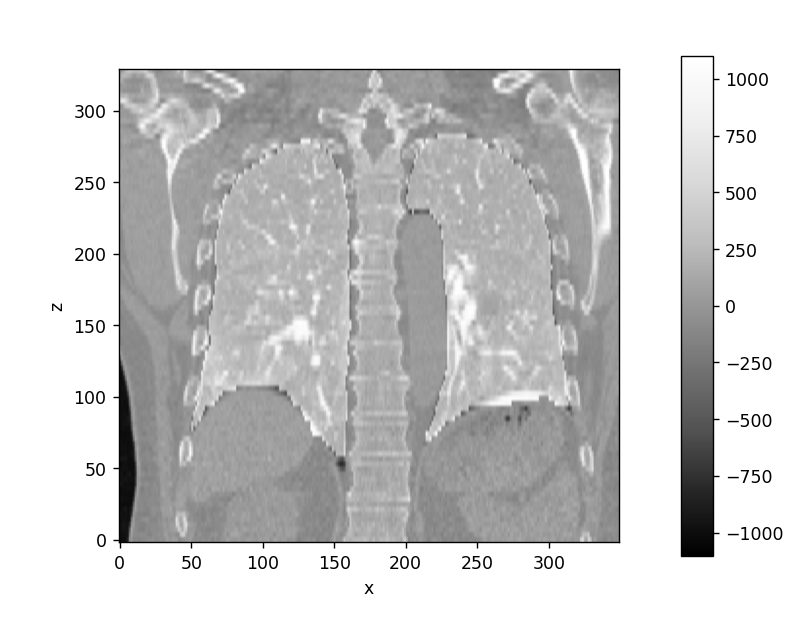

interactive(children=(SelectionSlider(description='phase', options=((0, 0), (10, 1), (20, 2), (30, 3), (40, 4)…

In [13]:
project.visual.view(case.anat + 1000*case.mask, x='x', y='z', cmap='Greys_r')